# Manejo de datos: Combinar y modificar la forma de nuestros datos

In [2]:
import numpy as np
import pandas as pd

In [3]:
DATA_ROOT = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition'
# DATA_ROOT = '.'

## Indices jerarquicos

La indexación jerárquica es una característica importante de pandas que le permite tener múltiples
tiple (dos o más) niveles de índice en un eje. De manera un tanto abstracta, proporciona una forma de
trabajar con datos de dimensiones superiores en una forma de dimensiones inferiores. Empecemos
con un ejemplo sencillo; crear una serie con una lista de listas (o matrices) como índice

In [4]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.059939
   2   -0.643142
   3   -2.447501
b  1    0.881122
   3    0.989094
c  1    1.336998
   2   -1.289558
d  2    0.003873
   3    0.873582
dtype: float64

In [5]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [6]:
print(data['b'])
print(data['b':'c'])
print(data.loc[['b', 'd']])

1    0.881122
3    0.989094
dtype: float64
b  1    0.881122
   3    0.989094
c  1    1.336998
   2   -1.289558
dtype: float64
b  1    0.881122
   3    0.989094
d  2    0.003873
   3    0.873582
dtype: float64


In [7]:
#La selección es incluso posible desde un nivel “interior”:

data.loc[:,2]

a   -0.643142
c   -1.289558
d    0.003873
dtype: float64

In [8]:
#La indexación jerárquica juega un papel importante en la remodelación de datos y en grupos.
#operaciones como formar una tabla dinámica. Por ejemplo, puede reorganizar los datos en
#un DataFrame usando su método unstack:

data.unstack()

,1,2,3
a,0.059939,-0.643142,-2.447501
b,0.881122,NaN,0.989094
c,1.336998,-1.289558,NaN
d,NaN,0.003873,0.873582


In [9]:
#Para volver a lo anterior tenemos el metodo stack()

data.unstack().stack()

a  1    0.059939
   2   -0.643142
   3   -2.447501
b  1    0.881122
   3    0.989094
c  1    1.336998
   2   -1.289558
d  2    0.003873
   3    0.873582
dtype: float64

In [10]:
#Con un DataFrame, cualquiera de los ejes puede tener un índice jerárquico
pd.DataFrame?

frame = pd.DataFrame(np.arange(12).reshape((4, 3)), 
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],['Green', 'Red', 'Green'],['tercer nivel','tercer nivel','tercer nivel']])
frame

Ohio                  Colorado
           Green          Red        Green
    tercer nivel tercer nivel tercer nivel
a 1            0            1            2
  2            3            4            5
b 1            6            7            8
  2            9           10           11

In [11]:
#Los niveles jerárquicos pueden tener nombres (como cadenas o cualquier objeto de Python). Si es así, estos
#aparecerá en la salida de la consola:

frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color','nivel']
frame

state             Ohio                  Colorado
color            Green          Red        Green
nivel     tercer nivel tercer nivel tercer nivel
key1 key2                                       
a    1               0            1            2
     2               3            4            5
b    1               6            7            8
     2               9           10           11

In [12]:
#Con la indexación de columnas parciales, puede seleccionar grupos de columnas de manera similar:

frame['Ohio']
#frame['Ohio']['Green']
#frame.iloc[2]

color            Green          Red
nivel     tercer nivel tercer nivel
key1 key2                          
a    1               0            1
     2               3            4
b    1               6            7
     2               9           10

### Cambiar el orden de los niveles de un indice jerarquico


A veces necesitará reorganizar el orden de los niveles en un eje u ordenar los datos
por los valores en un nivel específico. El swaplevel toma dos números o nombres de nivel
y devuelve un nuevo objeto con los niveles intercambiados (pero los datos son por lo demás
inalterado):

In [13]:
frame.swaplevel('key1', 'key2')

state             Ohio                  Colorado
color            Green          Red        Green
nivel     tercer nivel tercer nivel tercer nivel
key2 key1                                       
1    a               0            1            2
2    a               3            4            5
1    b               6            7            8
2    b               9           10           11

In [14]:
# sort_index, por otro lado, ordena los datos usando solo los valores en un solo nivel.
# Al intercambiar niveles, no es raro usar también sort_index para que el resultado sea
# ordenados lexicográficamente por el nivel indicado:


print(frame.swaplevel(0, 1))
print(frame.sort_index(level=0))
print(frame.swaplevel(0, 1).sort_index(level=0))


state             Ohio                  Colorado
color            Green          Red        Green
nivel     tercer nivel tercer nivel tercer nivel
key2 key1                                       
1    a               0            1            2
2    a               3            4            5
1    b               6            7            8
2    b               9           10           11
state             Ohio                  Colorado
color            Green          Red        Green
nivel     tercer nivel tercer nivel tercer nivel
key1 key2                                       
a    1               0            1            2
     2               3            4            5
b    1               6            7            8
     2               9           10           11
state             Ohio                  Colorado
color            Green          Red        Green
nivel     tercer nivel tercer nivel tercer nivel
key2 key1                                       
1    a              

### Resumen estadistico por nivel

Muchas estadísticas descriptivas y resumidas sobre DataFrame y Series tienen un nivel
opción en la que puede especificar el nivel que desea agregar en un determinado
eje. Considere el DataFrame anterior; podemos agregar por nivel en las filas o
columnas así:

In [15]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), 
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],['Green', 'Red', 'Green'],['tercer nivel','tercer nivel','tercer nivel']])
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color','nivel']


frame.max(level='key2')  #Sacamos el maximo en base a la Key2
#frame.mean(level='color', axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  


state         Ohio                  Colorado
color        Green          Red        Green
nivel tercer nivel tercer nivel tercer nivel
key2                                        
1                6            7            8
2                9           10           11

### Indexar datos a partir de una columna

No es inusual querer usar una o más columnas de un DataFrame como la fila
índice; alternativamente, es posible que desee mover el índice de fila a la columna de DataFrame.


In [16]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3



La función **set_index ** de DataFrame creará un nuevo DataFrame usando uno o más de
sus columnas como índice

In [17]:
frame2 = frame.set_index(['c','d'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [18]:
## De forma predeterminada, las columnas se eliminan del DataFrame, aunque puede dejarlas en:

frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [19]:
## reset_index(), por otro lado, hace lo contrario de set_index; el jerárquico
## los niveles de índice se mueven a las columnas:

frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Combinar/unir/mezclar DataFrames

![alt text](https://storage.googleapis.com/campus-cvs/lectures/3.4%20Merge%20Methods.png "Merge Methods")

### Joins estilo base de datos relacional

Las operaciones de combinación o combinación combinan conjuntos de datos al vincular filas usando una o más claves.
Estas operaciones son fundamentales para las bases de datos relacionales (por ejemplo, basadas en SQL). la fusión
La función en pandas es el principal punto de entrada para usar estos algoritmos en sus datos.

In [20]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df1)
print('---------------')
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
---------------
  key  data2
0   a      0
1   b      1
2   d      2


Este es un ejemplo de una unión de muchos a uno; los datos en df1 tienen múltiples filas etiquetadas como
***b***, mientras que df2 tiene solo una fila para cada valor en la columna clave. Fusión de llamadas
con estos objetos obtenemos:

In [21]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Tenga en cuenta que no especifiqué en qué columna unirse. Si esa información no es específica
De acuerdo, merge utiliza los nombres de las columnas superpuestas como claves. Es una buena práctica para
especificar explícitamente, sin embargo:

In [22]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0



Si los nombres de las columnas son diferentes en cada objeto, puede especificarlos por separado

In [23]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

print(df3)
print('---------------')
print(df4)
print('---------------')
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6
---------------
  rkey  data2
0    a      0
1    b      1
2    d      2
---------------


,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


Puede notar que los valores 'c' y 'd' y los datos asociados faltan en el
resultado. Por defecto, merge hace una unión 'interna'; las claves en el resultado son la intersección
ción, o el conjunto común que se encuentra en ambas tablas. Otras opciones posibles son 'left,
'right' y 'outter'. La unión exterior toma la unión de las llaves, combinando las
efecto de aplicar combinaciones izquierda y derecha:

In [24]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0



Las fusiones de muchos a muchos tienen un comportamiento bien definido, aunque no necesariamente intuitivo.

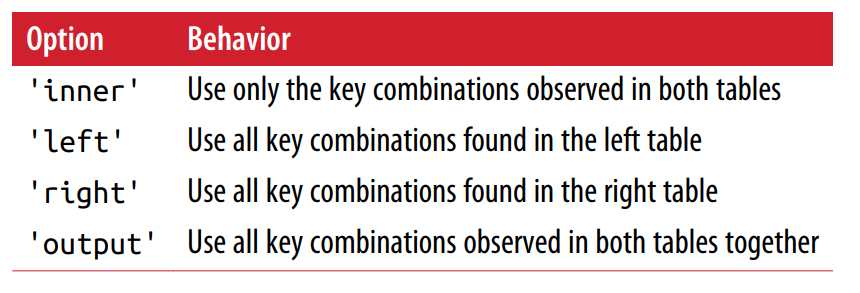


In [25]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
print(df1)
print('---------------')
print(df2)
print('---------------')
pd.merge(df1, df2, on='key', how='left')

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
---------------
  key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4
---------------


,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


Las uniones de muchos a muchos forman el producto cartesiano de las filas. Como eran tres
filas 'b' en el DataFrame izquierdo y dos en el derecho, hay seis filas 'b' en el
resultado. El método de combinación solo afecta a los distintos valores clave que aparecen en el resultado:

In [26]:
print(df1)
print('---------------')
print(df2)
print('---------------')

pd.merge(df1, df2, how='inner')

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
---------------
  key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4
---------------


,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


Para fusionarse con varias columnas, pasar una lista de nombres de columna:

In [27]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
print(left)
print('---------------')
print(right)
print('---------------')
pd.merge(left, right, on=['key1', 'key2'], how='outer')

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
---------------
  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7
---------------


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


Un último problema a considerar en las operaciones de combinación es el tratamiento de las columnas superpuestas.
nombres Si bien puede abordar la superposición manualmente, merge tiene una opción de sufijos para especificar cadenas para agregar
a nombres superpuestos en los objetos DataFrame izquierdo y derecho:

In [28]:
print(left)
print('---------------')
print(right)
print('---------------')

pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
---------------
  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7
---------------


,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Fusionar datos a partir de sus indices

En algunos casos, las claves de combinación en un DataFrame se encontrarán en su índice. En esto
caso, puede pasar left_index=True o right_index=True (o ambos) para indicar que
el índice debe usarse como la clave de combinación

In [29]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(left1)
print('---------------')
print(right1)
print('---------------')
pd.merge(left1, right1, left_on='key', right_index=True)

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
---------------
   group_val
a        3.5
b        7.0
---------------


,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


dado que el método de fusión predeterminado es intersectar las teclas de unión, en su lugar puede formar el
unión de ellos con una unión externa:

In [30]:
print(left1)
print('---------------')
print(right1)
print('---------------')

pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
---------------
   group_val
a        3.5
b        7.0
---------------


,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


Con datos indexados jerárquicamente, las cosas son más complicadas, ya que unirse al índice es
implícitamente una combinación de múltiples claves:

In [31]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
print(lefth)
print(righth)

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11


En este caso, debe indicar varias columnas para fusionarlas como una lista (tenga en cuenta el
manejo de valores de índice duplicados con how='outer'):

In [32]:
print(lefth)
print('---------------')
print(righth)
print('---------------')


print(pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True))
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0
---------------
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11
---------------
     key1  key2  data  event1  event2
0    Ohio  2000   0.0       4       5
0    Ohio  2000   0.0       6       7
1    Ohio  2001   1.0       8       9
2    Ohio  2002   2.0      10      11
3  Nevada  2001   3.0       0       1


,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [33]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
print(left2)
print('---------------')
print(right2)
print('---------------')
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
---------------
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
---------------


,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


DataFrame tiene una instancia de combinación conveniente para fusionar por índice. También se puede utilizar
combinar muchos objetos DataFrame que tienen índices iguales o similares pero
columnas que no se superponen. En el ejemplo anterior, podríamos haber escrito:

In [34]:
#left2.join()
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [35]:
print(left1)
print('---------------')
print(right1)
print('---------------')

left1.join(right1, on='key')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
---------------
   group_val
a        3.5
b        7.0
---------------


,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


Por último, para fusiones simples de índice sobre índice, puede pasar una lista de DataFrames para unirse como
una alternativa al uso de la función concat más general que se describe a continuación
sección:

In [36]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
print(another)
print('---------------')
print(left2)
print('---------------')
print(right2)
print('---------------')
left2.join([right2, another])
left2.join([right2, another], how='outer')

   New York  Oregon
a       7.0     8.0
c       9.0    10.0
e      11.0    12.0
f      16.0    17.0
---------------
   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
---------------
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
---------------


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenacion de datos a travez de un eje

Otro tipo de operación de combinación de datos se conoce indistintamente como concatenación.
enación, encuadernación o apilamiento. La función concatenar de NumPy puede hacer esto con
matrices NumPy:

In [37]:
arr = np.arange(12).reshape((3, 4))
arr
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

En el contexto de objetos pandas como Series y DataFrame, tener ejes etiquetados
le permiten generalizar aún más la concatenación de matrices. En particular, usted tiene un número
ber de cosas adicionales para pensar:
 

*   Si los objetos están indexados de manera diferente en los otros ejes, ¿deberíamos combinar los elementos distintos en estos ejes o utilizar sólo los valores compartidos (la intersección)?
*   ¿Los fragmentos concatenados de datos deben ser identificables en el resultado objeto?
*   ¿El “eje de concatenación” contiene datos que deben conservarse? En muchos casos, las etiquetas enteras predeterminadas en un DataFrame se descartan mejor durante concatenación.



La función concat en pandas proporciona una forma coherente de abordar cada una de estas
preocupaciones.

In [38]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [39]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

Por defecto, concat funciona a lo largo del axis = 0, produciendo otra Serie. Si pasa axis = 1,
en cambio, el resultado será un DataFrame (axis = 1 son las columnas):

In [40]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


En este caso no hay solapamiento en el otro eje, que como podéis ver es el ordenado
unión (la unión 'outer') de los índices. En su lugar, puede cruzarlos pasando
join = 'inner':

In [41]:
s4 = pd.concat([s1, s3])
s4
pd.concat([s1, s4], axis=1)
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


Un problema potencial es que las piezas concatenadas no son identificables en el resultado. Suponga en su lugar, quería crear un índice jerárquico en el eje de concatenación. Para
hacer esto, use el argumento de las claves:

In [42]:
print(s1)
print('---------------')
print(s2)
print('---------------')
print(s3)
print('---------------')
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result
#result.unstack()

a    0
b    1
dtype: int64
---------------
c    2
d    3
e    4
dtype: int64
---------------
f    5
g    6
dtype: int64
---------------


one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

En el caso de combinar Series a lo largo del axis = 1, las claves se convierten en los encabezados de columna de DataFrame

In [43]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


La misma lógica se extiende a los objetos DataFrame:

In [44]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
print(df1)
print('---------------')
print(df2)
print('---------------')
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

   one  two
a    0    1
b    2    3
c    4    5
---------------
   three  four
a      5     6
c      7     8
---------------


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

Si pasa un diccionario de objetos en lugar de una lista, las claves del diccionario se utilizarán para las claves
llave:

In [45]:
print(df1)
print('---------------')
print(df2)
print('---------------')

pd.concat({'level1': df1, 'level2': df2}, axis=1)

   one  two
a    0    1
b    2    3
c    4    5
---------------
   three  four
a      5     6
c      7     8
---------------


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [46]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0


Una última consideración se refiere a los marcos de datos en los que el índice de fila no contiene
Cualquier dato relevante:

In [47]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
print(df1)
print(df2)

          a         b         c         d
0  0.909006  1.334569 -0.495335  0.993074
1 -1.220930 -1.565920  0.004240 -0.116026
2  2.518839  0.379800 -1.207891  2.041014
          b         d         a
0  0.505399  0.839407  0.103163
1  0.351868 -0.447359 -1.058466


In [48]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.909006,1.334569,-0.495335,0.993074
1,-1.220930,-1.565920,0.004240,-0.116026
2,2.518839,0.379800,-1.207891,2.041014
3,0.103163,0.505399,NaN,0.839407
4,-1.058466,0.351868,NaN,-0.447359


### Combinando datos con traslape

Hay otra situación de combinación de datos que no se puede expresar como una combinación
o operación de concatenación. Puede tener dos conjuntos de datos cuyos índices se superponen por completo
o parte. Como ejemplo motivador, considere la función where de NumPy, que realiza
el equivalente orientado a matrices de una expresión if-else:

In [49]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
print(a)
print('---------------')
print(b)
print('---------------')
print(np.where(pd.isnull(a), b, a)) #Toma intercaladamente cada array
np.where?

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64
---------------
f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64
---------------
[0.  2.5 2.  3.5 4.5 nan]



Series tiene un método combine_first, que realiza el equivalente de esta operación
junto con la lógica de alineación de datos habitual de pandas

In [50]:
print(b[:-2])
print(a[2:])
b[:-2].combine_first(a[2:])

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64


a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

Con DataFrames, combine_first hace lo mismo columna por columna, por lo que
puede pensar en ello como "parchar" datos faltantes en el objeto que llama con datos del
objeto que pasas:

In [51]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1
df2
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Pivoteo de datos y cambio de forma de los datos

### Cambios de forma con indices jerarquicos

La indexación jerárquica proporciona una forma coherente de reorganizar los datos en un DataFrame.
Hay dos acciones principales:

Apilar
Esto "rota" o gira de las columnas en los datos a las filas
Desapilar
Esto gira de las filas a las columnas.

In [52]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


El uso del método de pila en estos datos pivota las columnas en las filas, produciendo un
Serie:

In [53]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

A partir de una serie indexada jerárquicamente, puede reorganizar los datos de nuevo en una serie de datos.
Marco con unstack():

In [54]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


Por defecto, el nivel más interno está desapilado (lo mismo con la pila). Puede desapilar una
nivel diferente pasando un número de nivel o nombre:

In [55]:
result.unstack(0)
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


Desapilar podría introducir datos faltantes si no se encuentran todos los valores en el nivel en cada uno de los subgrupos

In [56]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0



El apilamiento filtra los datos que faltan de forma predeterminada, por lo que la operación es más fácil de invertir

In [57]:
data2.unstack()
data2.unstack().stack()
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

Cuando desapila en un DataFrame, el nivel desapilado se convierte en el nivel más bajo en el resultado:

In [58]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

Al llamar a stack, podemos indicar el nombre del eje a apilar:

In [59]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivotear de un formato "largo" a uno "ancho"

Una forma común de almacenar múltiples series de tiempo en bases de datos y CSV es en los llamados largos
o formato apilado. Carguemos algunos datos de ejemplo y hagamos una pequeña cantidad de series de tiempo
disputas y otra limpieza de datos:

In [60]:
data = pd.read_csv(DATA_ROOT + '/examples/macrodata.csv')
data.head()
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [61]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


Este es el llamado formato largo para múltiples series de tiempo u otros datos de observación.
con dos o más claves (aquí, nuestras claves son fecha y artículo). Cada fila de la tabla representa
envía una única observación.
Los datos se almacenan con frecuencia de esta manera en bases de datos relacionales como MySQL, como un
esquema (nombres de columna y tipos de datos) permite el número de valores distintos en el
columna de elemento para cambiar a medida que se agregan datos a la tabla. En el ejemplo anterior, la fecha
y el elemento generalmente serían las claves principales (en el lenguaje de la base de datos relacional), ofreciendo
tanto la integridad relacional como las uniones más fáciles. En algunos casos, los datos pueden ser más difíciles.
culto para trabajar en este formato; es posible que prefiera tener un DataFrame que contenga
una columna por valor de elemento distinto indexado por marcas de tiempo en la columna de fecha. Datos-
El método de pivote de Frame realiza exactamente esta transformación:

In [72]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1



Los dos primeros valores pasados ​​son las columnas que se utilizarán respectivamente como fila y
índice de columna, luego, finalmente, una columna de valor opcional para llenar el DataFrame. Suponer
tenías dos columnas de valor que querías remodelar simultáneamente:

In [73]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.170472
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.258904
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.395583
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.892763
4,1959-06-30 23:59:59.999999999,infl,2.340,0.203601
5,1959-06-30 23:59:59.999999999,unemp,5.100,-1.309643
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-1.561841
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.471032
8,1959-09-30 23:59:59.999999999,unemp,5.300,0.278363
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,1.341922


Al omitir el último argumento, obtiene un DataFrame con columnas jerárquicas:

In [64]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


Tenga en cuenta que pivote es equivalente a crear un índice jerárquico usando set_index después
bajado por una llamada para desapilar:

In [65]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.808097 -0.846613   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.153917  2.176698   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -2.593222 -0.764008   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.310174  0.230237   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.057213  0.137706   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2  1.004852  0.748763   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -0.970611 -0.017272   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -1.341193  
1959-06-30 23:59:59.999999999  1.593285  
1959-09-30 23:59:59.999999999 -0.839884  
1959-12-31 23:59:59.999999999 -1.481369  
1960-03-31 23:59:59.999999999 -0.038348  
1960-06-30 23:59:59.999999999 -0.277200  
1960-09-30 23:59:59.999999999  0.656519

### Pivotear de un formato "ancho" a uno "largo"

Una operación inversa para pivotar para DataFrames es pandas.melt. En lugar de trans-
formando una columna en muchas en un nuevo DataFrame, fusiona múltiples columnas en
one, produciendo un DataFrame que es más largo que la entrada. Veamos un ejemplo:

In [66]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


La columna 'clave' puede ser un indicador de grupo, y las otras columnas son valores de datos.
Al usar pandas.melt, debemos indicar qué columnas (si las hay) son indicativas de grupo.tores Usemos 'clave' como el único indicador de grupo aquí:

In [67]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


Usando pivote, podemos remodelar de nuevo al diseño original:

In [68]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


Dado que el resultado del pivote crea un índice a partir de la columna utilizada como etiquetas de fila,
puede querer usar reset_index para mover los datos a una columna:

In [69]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


También puede especificar un subconjunto de columnas para usar como columnas de valor

In [70]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


pandas.melt también se puede usar sin ningún identificador de grupo

In [71]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
